# Project: Investigate a Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#q1">Question 1</a></li>
    <li><a href="#q2">Question 2</a></li>
    <li><a href="#q3">Question 3</a></li>
    <li><a href="#q4">Question 4</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Dataset we are using, contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. For each movie, it contains: the popularity, the budget, the revenue, the original title, the casting, the homepage url, the director, the tagline, the keywords, the overview, the runtime, the genres the movie has been attached to, the production companies names, the movie release date, the user vote count, the average of the votes, the year of the release, the budget and revenue of the movie in terms of 2010 dollars accounting for inflation over time.
> In the next, we will process those information to find the answers for five questions:
1. Which genres are popular from year to year ?
2. What kind of properties are associated with movies that have high revenues ?
3. Which production companies - top 3 -  are generating more revenues for the last ten years ? why ?
4. who are the most frequent cast members associated with the most popular movies ?
5. Do unpopular movies have common properties ?  

> Due to the basic analysis techniques we are using, our findings below should be considered as tentatives. We do not use any statistical approach. We rely on the learnings so far.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

<a id='wrangling'></a>
## Data Wrangling

> Load in the data, check for cleanliness. Trim and then clean the movie dataset for analysis.

### General Properties

In [68]:
# Load the dataset.
df = pd.read_csv('tmdb-movies.csv')

# Print out few lines to get a first view
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


#### Observations
Each of the columns "genre", "production_companies" and "cast" contains values separated by several "|". As the questions we are trying to answer are related to those columns, it will be necessary to split their data appropriately.
The columns names are lower cases, not too long and use a separation character "-" where it is needed. So there is no need for changes. Those names are easily manageables for our analysis.
The next step is to assess and inspect the data.

### Data Assessing and Inspection

In [69]:
# Get the dataset size
df.shape

(10866, 21)

The dataset contains 10866 rows and 21 columns, which lead to 228186 samples.
Let's verify if some of there are duplicated or not.

In [70]:
# Check the number of duplicated rows
sum(df.duplicated())

1

Only one duplicated row exists.
So do we have missing data somewhere ?

In [71]:
# Check the rows with missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The following 8 columns have missing data: imdb_id : 10, cast : 76, homepage : 7930, director : 44, tagline : 2824, keywords : 1493, genres : 23, production_companies : 1030.
The next step is to check the coherency of the data types for our further analysis.

In [72]:
# Get a view on the existing data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

* "budget" and "revenue" are types "int" while the ones with accounting for inflation over time "budget_adj" and "revenue_adj" are "float".
* "imdb_id" is in a complext "object" type. It might be because it countains numbers and letters. 
The data types inspection presents some "object" types. Because of the way pandas handle data structure, those might be "string" typed. So we need to dive in here to ensure those types could be manageable for the further analysis. 

In [73]:
# Get visibility on the "object" type
type(df['imdb_id'][0]), type(df['original_title'][0]), type(df['cast'][0]), type(df['homepage'][0]), type(df['director'][0]), type(df['tagline'][0]), type(df['keywords'][0]), type(df['overview'][0]), type(df['genres'][0]), type(df['production_companies'][0]), type(df['release_date'][0])

(str, str, str, str, str, str, str, str, str, str, str)

* "release_date" is a "string" and "release_year" an integer. They both need to be datetime type.
* "budget" and "revenue" are integers. They need to be "float" like "budget_adj" and "revenue_adj".

### Data Cleaning

> Following the discoveries from the assessment phase, first, we drop the missing values. Then we dedupe the data by removing the duplicated ones. Finally we correct the data type mismatch reported earlier.

#### Drop rows with missing values

In [74]:
# Drop row with missing value
df.dropna(inplace=True)

In [75]:
# Check if we still have columns with missing values - should be "False"
df.isnull().sum().any()

False

There is no more columns with missing values in the movie dataset.  
Our next step is to remove the duplicates previously identified.

#### Dedupe data

In [76]:
# Drop the duplicates
df.drop_duplicates(inplace=True)

In [77]:
# Check. Print the number of duplicated to confirm dedupe - should be "0"
df.duplicated().sum()

0

All the duplicated are removed.  
Now we can go ahead and fix the data types.

#### Adapt and Fix data types

In [78]:
# Set "release_date" type to datetime
df['release_date'] = df['release_date'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%y'))

# Check the "release_date" type conversion to datetime
type(df.release_date[0])

pandas._libs.tslib.Timestamp

The type change is confirmed for "release_date".  
Now we do the same for "release_year", but we change his type to "string" and then to timestamp.

In [79]:
# Set "release_year" type to "string" first
df['release_year'] = df['release_year'].astype(str)
# Set "release_year" type to datetime
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

# Check the "release_year" type conversion result
type(df.release_year[0])

pandas._libs.tslib.Timestamp

The "Timestamp" we have on the output confirms the change.

As all data types have been fixed, we now start the analysis to find the answers for our questions.

<a id='eda'></a>
## Exploratory Data Analysis

> Compute statistics and create visualizations with the goal of addressing the research questions listed in the Introduction section.

First of all, get a summary statistics about the dataframe

In [80]:
# Get a summary about the dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,4.250000e+08,2.827124e+09


<a id='q1'></a>
### Question 1: Which genres are popular from year to year ?

#### Approach
1. Get the most popular genre per year : so we group by year and select only the line with the most popular genre.
2. Merge that result with the original dataset, on the popularity, to ensure to get all the other columns information, in case it is needed for further investigation.

#### Data adaptation: genre data stacking

Each cell in the "genres" column contains several values separated by a "|" character. To answer the question, we need to have one genre per line. Here is the approach we use:
1. for each cell we remove any "|" character at the begining or at the end
2. we split the content according to the "|" character we encounter, in order to have one column per genre
3. we stack all the new genres columns into one single column. So for each genre, we get additional lines into the dataset
4. we rename the new column to "genre"
5. we add this new column to the original dataset  

This way of slipping and stacking has been obtained from the Udacity's student forum.

In [81]:
# Remove the "|" and split each cell content accordingly, in colums
df_genre = df.join(df.genres.str.strip('|').str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre'))

# Check visually the content of the new "genre" column
df_genre.genre.tail(4)

10817    Documentary
10817          Music
10819         Action
10819         Comedy
Name: genre, dtype: object

In [82]:
# Group by release_year and get the most highest popularity score
df_max_pop = df_genre.groupby('release_year')[['popularity']].max()

# merge with the original dataset, on popularity, so we keep only the lines with the highest popularity scores
df_pop_genres = pd.merge(df_genre, df_max_pop, on='popularity')

The new dataset "df_pop_genres" is a subset of the original dataset, but grouped by release_year and only with the lines which contain the highest popularity scores.  
Now we create visualizations to see the popular genres from year to year.

#### Visualization
We use seaborn and the included categorical visualization feature.
The idea came from a look to the seaborn tutorial: https://seaborn.pydata.org/tutorial.html

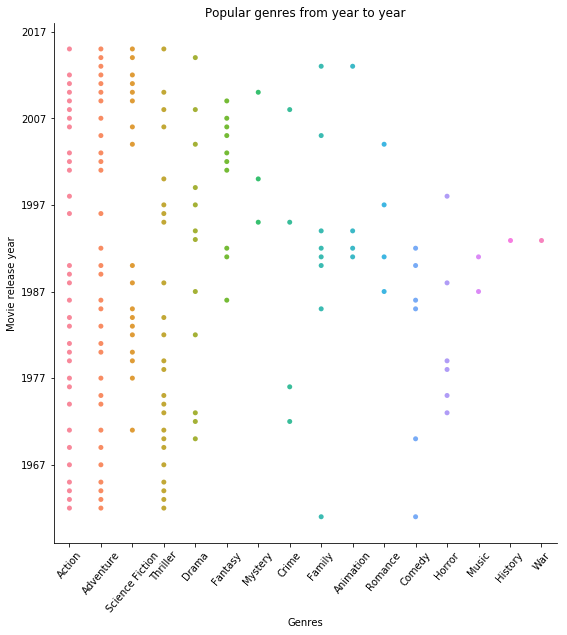

In [83]:
# plot "genre" and "release_year" in swarn, using seaborn
myplot = sns.catplot(x="genre", y="release_year", kind="swarm", data=df_pop_genres, height=8)

myplot.set(title='Popular genres from year to year', xlabel='Genres', ylabel='Movie release year')

# rotate the "genre" labels on the visualization for better visibility
myplot.set_xticklabels(rotation=50);

#### Observation and result

From the visualization above, "Action" and "Adventure" are the most popular genres from year to year. On the visualization they are the ones with the most points along the years.  
"Thriller" and "Science Fiction" respectively, come after. It is interesting to see that "Science Fiction" popularity raised after 1975. "Action", "Adventure" and "Science Fiction" popularities decreased between the years 1990 and 2000 while the other genres like "Family" and "Animation" gained popularity.


<a id='q2'></a>
### Question 2 : What kind of properties are associated with movies that have high revenues ?

#### Approach

We plot the revenues for an idea about the values. This help to decide the way to select the movies with high revenues. We use "revenue_adj" which includes the inflation over time.

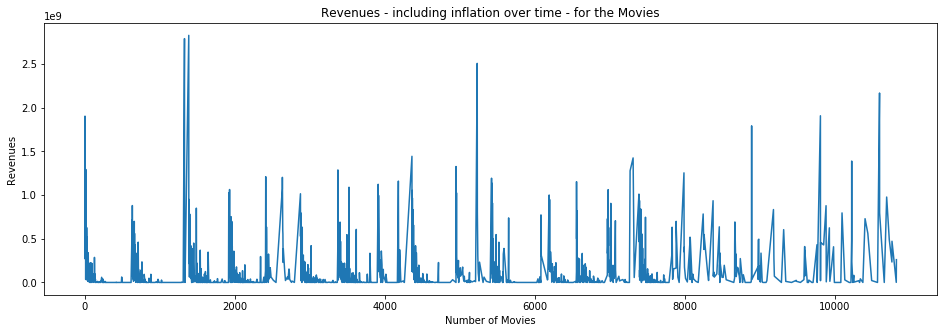

In [84]:
# plot the revenues for all movies in the dataset
plt.subplots(figsize=(16, 5))
plt.plot(df.revenue_adj)
plt.title('Revenues - including inflation over time - for the Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Revenues');

We have very few movies with very high revenues. Consequently we simply use the pandas nlargest() function to select the movies with high revenues. Looking in the Pandas doc about a way to select data, we came out to this simple way of doing.

In [85]:
# select high revenues
high_revenues = df.revenue_adj.nlargest()

# list the high revenues
high_revenues

1386     2.827124e+09
1329     2.789712e+09
5231     2.506406e+09
10594    2.167325e+09
9806     1.907006e+09
Name: revenue_adj, dtype: float64

We create a dataframe for the high revenues movies

In [86]:
# Get an entire dataframe for movies with high revenues
df_high_revenues = df.query('revenue_adj in @high_revenues')

For an easy exploration, we add a new column "revenue_level" to the original dataframe, which contains 'high' if the movie has a high revenue and 'low' otherwise.

In [87]:
# Add a new column "revenue_level" with "low" as default value
df_revenues = df.assign(revenue_level='low')

In [88]:
# set "high" where for the movies with high revenues
for revenue in high_revenues:
    df_revenues.loc[df_revenues['revenue_adj'] == revenue, 'revenue_level'] = 'high'

Now we explore the properties associated with movies with high revenues.

#### Explore the budget association with movies that have high revenues

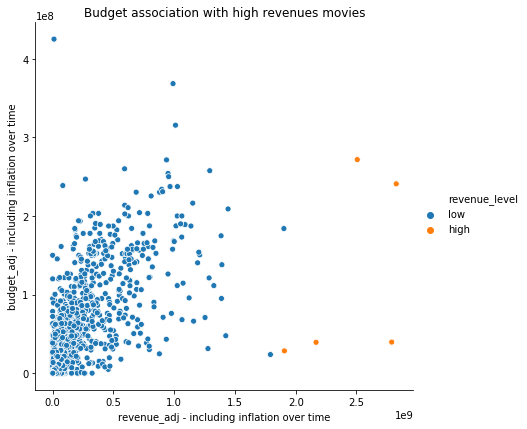

In [89]:
# plot of budget association with revenue
budgetplot = sns.relplot(x="revenue_adj", y="budget_adj", hue="revenue_level", data=df_revenues, height=6)
budgetplot.set(title='Budget association with high revenues movies', xlabel='revenue_adj - including inflation over time', ylabel='budget_adj - including inflation over time');

Based on the high revenue_level points positioning, talking about budgets, we could say there is no specificities regarding movies with revenues.

#### Explore the vote_count association with movies that have high revenues

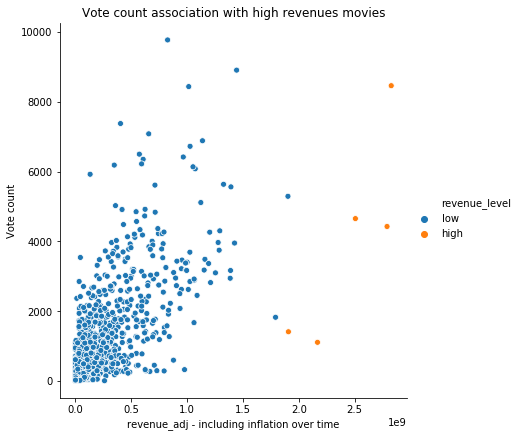

In [90]:
# plot of budget association with revenue
vote_countplot = sns.relplot(x="revenue_adj", y="vote_count", hue="revenue_level", data=df_revenues, height=6)
vote_countplot.set(title='Vote count association with high revenues movies', xlabel='revenue_adj - including inflation over time', ylabel='Vote count');

Except for one of them, the movies that have high revenues have a vote_count below 6000. Which is the case for most of the movies. This is nothing special or specific to the movies with high revenues here.

#### Explore the vote_average association with movies that have high revenues

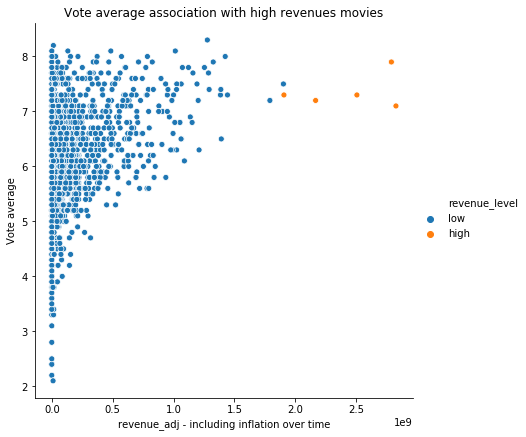

In [118]:
# plot of vote_average association with revenue
vote_averageplot = sns.relplot(x="revenue_adj", y="vote_average", hue="revenue_level", data=df_revenues, height=6)
vote_averageplot.set(title='Vote average association with high revenues movies', xlabel='revenue_adj - including inflation over time', ylabel='Vote average');

The movies with the highest revenues have vote_average above 7. We could say that this is just the confirmation of a normal situation. The revenues are mainly the results of the number of people who went to see the movie, which increase because of the success, so the votes.  

#### Explore popularity association with movies that have high revenues

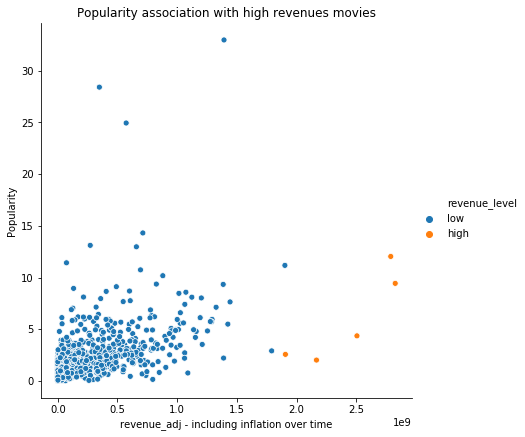

In [117]:
popularity_plot = sns.relplot(x="revenue_adj", y="popularity", hue="revenue_level", data=df_revenues, height=6)
popularity_plot.set(title='Popularity association with high revenues movies', xlabel='revenue_adj - including inflation over time', ylabel='Popularity');

The movies with high revenues have popularities below 15. This is not that high, like the others. Indeed the majority of the movies has popularity below 15. 

#### Assess genres association with movies that have high revenues

We use the dataset we created for movies with high revenues. To explore the genre easily, we need to have one genre per line, so we split the genres in columns and then stack them back to only one column.

In [93]:
# get the movies with high revenues
df_high_revenues = df_revenues.query('revenue_level == "high"')

In [94]:
# Remove the "|" and split each cell content accordingly, in colums, then stack the column
df_hr_genre = df_high_revenues.join(df_high_revenues.genres.str.strip('|').str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre'))

In [95]:
# Observe the unique genres associated with movies with high revenues
df_hr_genre.genre.unique()

array(['Adventure', 'Action', 'Science Fiction', 'Fantasy', 'Drama',
       'Romance', 'Thriller', 'Horror'], dtype=object)

What are the recurrent genres for those movies ?

In [96]:
# Get the occurence of each genre.
df_hr_genre['genre'].value_counts()

Adventure          3
Thriller           3
Action             2
Drama              2
Horror             2
Science Fiction    2
Fantasy            1
Romance            1
Name: genre, dtype: int64

We are exploring 5 movies here. Relating the result to our previous findings, we could say that "Adventure" and "Thriller" appear to be the top emerging genres for high revenues movies.

#### Assess cast association with movies that have high revenues

We simply explore the possibility to find any meaningful information about the casting of the movies that have high revenues.

In [97]:
# Get all the cast for our high revenues movies. Remove the "|" and split each cell content accordingly, in colums, then stack the column
df_hr_cast = df_high_revenues.join(df_high_revenues.cast.str.strip('|').str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('cast_name'))

In [98]:
# Get the occurence of each cast name.
df_hr_cast['cast_name'].value_counts()

Sigourney Weaver      1
Ellen Burstyn         1
Stephen Lang          1
Roy Scheider          1
Carrie Fisher         1
Sam Worthington       1
Jason Miller          1
Robert Shaw           1
Alec Guinness         1
Zoe Saldana           1
Kate Winslet          1
Peter Cushing         1
Kathy Bates           1
Lorraine Gary         1
Lee J. Cobb           1
Murray Hamilton       1
Mark Hamill           1
Max von Sydow         1
Frances Fisher        1
Richard Dreyfuss      1
Michelle Rodriguez    1
Harrison Ford         1
Leonardo DiCaprio     1
Linda Blair           1
Billy Zane            1
Name: cast_name, dtype: int64

We have famous names, but no reccurence. These are the cast properties for movies with high revenues. 
Finding if the cast has an impact to the movies revenues require a more deeper statistical approach aver the whole dataframe.

#### Assess directors association with movies with high revenues

First we find the directors associated with movies with high revenues. Then according to the findings we explore any meaningful information we could identify.

In [99]:
# Get all the directrors for our high revenues movies. Remove the "|" and split each cell content accordingly, in colums, then stack the column
df_hr_directors = df_high_revenues.join(df_high_revenues.director.str.strip('|').str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('director_name'))

In [100]:
# Get the directors names. Any occurence of each of them ?
df_hr_directors['director_name'].value_counts()

James Cameron       2
George Lucas        1
Steven Spielberg    1
William Friedkin    1
Name: director_name, dtype: int64

"James Cameron" was directing 2 movies with high revenues. This is a key regarding the number of high revenues movies we consider.

#### Assess production companies associatoon with movies with high revenues

We find the production companies associated with high revenues movies. 

In [101]:
# Get all the production companies for our high revenues movies. Remove the "|" and split each cell content accordingly, in colums, then stack the column
df_hr_prodcomp = df_high_revenues.join(df_high_revenues.production_companies.str.strip('|').str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('prodcomp_name'))

In [102]:
# Get the production companies names. Any occurence of each of them ?
df_hr_prodcomp['prodcomp_name'].value_counts()

Twentieth Century Fox Film Corporation    3
Lightstorm Entertainment                  2
Ingenious Film Partners                   1
Paramount Pictures                        1
Dune Entertainment                        1
Hoya Productions                          1
Universal Pictures                        1
Warner Bros.                              1
Zanuck/Brown Productions                  1
Lucasfilm                                 1
Name: prodcomp_name, dtype: int64

The "Twentieth Century Fox Film Corporation" produced 3 of the most high revenues movies. "Lightstorm Entertainment" was in involved in 2 of them. But it does not necessarly mean that they are the ones who know how to produce high revenues movies.

#### Observation as conclusion for the question

Only few movies have very high revenues. Beyond their properties we listed, any specific properties to a high revenue movie could be related to the genres: Adventure and Thriller, the production company: the Fox, and the director: James Cameron.
Our explorations here are tentatives to find meaning, not a pure and professional statistical approach.

<a id='q3'></a>
### Question 3: Which production companies are generating more revenues for the last ten years ?

#### Approach

1. We reduce the dataframe to the movies released during the last ten years
2. We group by the movies with more revenues during the last ten years
3. We find and list the production companies.

In [105]:
# Movies for the last ten years. As the last release year is 2015, we start from 2005
df_last_ten = df.query('release_year > 2005')

In [112]:
# Get the movies with more revenues. We use revenue_adj
df_more_revenues = df_last_ten.groupby('release_year')[['revenue_adj']].max()

In [113]:
# merge to the movies for the last ten years, to get all the informations about them
df_prod_revenues = pd.merge(df_last_ten, df_more_revenues, on='revenue_adj')

To get the production companies names, we need first to stack the column "production_companies", then we list them and look for any recurrence.

In [114]:
# Get all the production companies for our high revenues movies. Remove the "|" and split each cell content accordingly, in colums, then stack the column
df_prod_more_revenues = df_prod_revenues.join(df_prod_revenues.production_companies.str.strip('|').str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('prodcomp_name'))

Now we list the production companies name and look for any recurrence

In [116]:
# list the production companies names and recurrence in the dataframe
df_prod_more_revenues['prodcomp_name'].value_counts()

Walt Disney Pictures                      4
Jerry Bruckheimer Films                   2
Second Mate Productions                   2
Warner Bros.                              2
WingNut Films                             1
Bad Robot                                 1
Syncopy                                   1
Marvel Studios                            1
Pixar Animation Studios                   1
Twentieth Century Fox Film Corporation    1
Lightstorm Entertainment                  1
DC Comics                                 1
Dune Entertainment                        1
Legendary Pictures                        1
3Foot7                                    1
Moving Picture Company (MPC)              1
Ingenious Film Partners                   1
Walt Disney Animation Studios             1
New Line Cinema                           1
Heyday Films                              1
Metro-Goldwyn-Mayer (MGM)                 1
Truenorth Productions                     1
Lucasfilm                       

#### Observation as conclusion for the question

"Walt Disney Pictures" is the winner here, on top of the production companies which generated more revenus during the last ten years. Based on our approach which is to take the top revenue maker for each year, it is not surprising to see the "Twentieth Century Fox Film Corporation" in the list with only one occurence.  
Another approach, more statistical, which is not yet our strength here, would be to consider all the movies for the last ten years and use the quantiles to select the ones with more revenues. 

<a id='q4'></a>
### Question 4: who are the most frequent cast members associated with the most popular movies ?

#### Approach

1. We reduce the dataframe to the most popular movies
2. We stack the cast members column and list their names in a way to find any recurrence

From the previous explorations, we saw very high popular movies. So we focus on them simply using the pandas nlargest() function.

In [119]:
# Get the most popularities for movies
most_popularities = df.popularity.nlargest()
most_popularities

0      32.985763
1      28.419936
629    24.949134
630    14.311205
2      13.112507
Name: popularity, dtype: float64

In [121]:
# most popular movies and all their properties
df_most_pop = df.query('popularity in @most_popularities')

Now stack, as done previously, the cast members names columns, so we can list them one by one

In [123]:
# Get all the cast names. Remove the "|" and split each cell content accordingly, in colums, then stack the column
df_mostf_cast = df_most_pop.join(df_most_pop.cast.str.strip('|').str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('cast_name'))

In [124]:
# list the castnames and recurrence in the dataframe
df_mostf_cast['cast_name'].value_counts()

Chris Pratt            2
Tom Hardy              1
Dave Bautista          1
Kate Winslet           1
Theo James             1
Josh Helman            1
Shailene Woodley       1
Charlize Theron        1
Hugh Keays-Byrne       1
Ansel Elgort           1
Nicholas Hoult         1
Zoe Saldana            1
Matthew McConaughey    1
Bradley Cooper         1
Vin Diesel             1
Anne Hathaway          1
Vincent D'Onofrio      1
Casey Affleck          1
Jessica Chastain       1
Miles Teller           1
Irrfan Khan            1
Michael Caine          1
Nick Robinson          1
Bryce Dallas Howard    1
Name: cast_name, dtype: int64

#### Observation as conclusion for the question

Even if one them - here Chirs Pratt - was involved twice, there is not enough recurrence. The exploration here does not lead to clearly understand if a cast name might lead to more popularity. This situation is coming from the fact that our approach to select the "most popular" movies is quite basic. Indeed we are not using any statistical approach, so we get basic insights.

<a id='conclusions'></a>
## Conclusions

> The most popular genres from year to year as we observed are Action, Adventure and Thriller. The genres associated with the movies with high revenues are first Adventure and Thriller, and then Action.  
As our approach was basic, we consider those findings as basic indications or insights at this stage. A more statistical approach will certainly lead to find more precise information, especially regarding the directors and the production companies associated with high revenues movies. Indeed, during our analysis, we noted that the range of data to be considered as "high revenues" and "most popular" has to be determined with a more elaborated approach.

In [126]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0